#### 🏪Walmart Sales Dataset of 45stores
🔹 데이터셋 : https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores

📌 데이터 불러오기 및 분석

In [132]:
import pandas as pd
import numpy as np

In [133]:
mart = pd.read_csv('walmart.csv', usecols=list(range(1,8)), parse_dates=['Date'])
mart.head()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [134]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6435 non-null   datetime64[ns]
 1   Weekly_Sales  6435 non-null   float64       
 2   Holiday_Flag  6435 non-null   int64         
 3   Temperature   6435 non-null   float64       
 4   Fuel_Price    6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 352.0 KB


In [135]:
mart.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


📌 데이터 전처리

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
def mapQuarters(num):
    if num >= 10:
        return 4
    elif num >= 7:
        return 3
    elif num >= 4:
        return 2
    else:
        return 1

In [138]:
mart['Day'] = mart['Date'].dt.dayofweek     # 0(Monday) ~ 6(Sunday)
mart['month'] = mart['Date'].dt.month
mart['quarter'] = mart['month'].apply(lambda x : mapQuarters(x))

In [139]:
mart.drop('Date', axis=1, inplace=True)

In [140]:
mart.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,quarter
0,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2
1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,4
2,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,1
3,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,1
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2


In [141]:
mart.Holiday_Flag.astype('str')

0       0
1       1
2       0
3       0
4       0
       ..
6430    0
6431    0
6432    0
6433    0
6434    0
Name: Holiday_Flag, Length: 6435, dtype: object

In [142]:
dummy_df = pd.get_dummies(mart['Holiday_Flag'])
dummy_df

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
6430,1,0
6431,1,0
6432,1,0
6433,1,0


In [143]:
mart.drop('Holiday_Flag', axis=1, inplace=True)

In [145]:
mart = pd.concat([mart, dummy_df], axis=1)

In [146]:
mart.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Day,month,quarter,0,1
0,1643690.90,42.31,2.572,211.096358,8.106,6,5,2,1,0
1,1641957.44,38.51,2.548,211.242170,8.106,3,12,4,0,1
2,1611968.17,39.93,2.514,211.289143,8.106,4,2,1,1,0
3,1409727.59,46.63,2.561,211.319643,8.106,4,2,1,1,0
4,1554806.68,46.50,2.625,211.350143,8.106,0,5,2,1,0


In [147]:
corr_df = pd.DataFrame(mart.corr()['Weekly_Sales'][1:].sort_values(ascending=False))
corr_df.style.background_gradient(cmap='Blues')

,Weekly_Sales
month,0.067535
quarter,0.056804
1,0.036891
Fuel_Price,0.009464
Day,-0.021041
0,-0.036891
Temperature,-0.063810
CPI,-0.072634
Unemployment,-0.106176


📌 학습용, 테스트용 데이터 분리

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
mart.Weekly_Sales = np.log(mart.Weekly_Sales)
y = mart.pop('Weekly_Sales')

In [150]:
y

0       14.312455
1       14.311400
2       14.292966
3       14.158907
4       14.256862
          ...    
6430    13.477481
6431    13.505522
6432    13.506897
6433    13.484400
6434    13.541444
Name: Weekly_Sales, Length: 6435, dtype: float64

In [193]:
mart.drop(['Day', 'quarter', 0, 1], axis=1, inplace=True)

In [194]:
mart.head()

,Temperature,Fuel_Price,CPI,Unemployment,month
0,42.31,2.572,211.096358,8.106,5
1,38.51,2.548,211.242170,8.106,12
2,39.93,2.514,211.289143,8.106,2
3,46.63,2.561,211.319643,8.106,2
4,46.50,2.625,211.350143,8.106,5


In [195]:
X_tr, X_te, y_tr, y_te = train_test_split(mart, y, random_state=42, test_size=0.2)

In [196]:
X_tr.shape, y_tr.shape

((5148, 5), (5148,))

In [197]:
X_te.shape, y_te.shape

((1287, 5), (1287,))

📌 학습 및 평가

In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.utils import *

import matplotlib.pyplot as plt

In [199]:
rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
y_pre = rf.predict(X_te)
mean_squared_error(y_te, y_pre), r2_score(y_te, y_pre)

(0.2898539268986797, 0.18838314916508703)

In [200]:
ip_df = pd.DataFrame(rf.feature_importances_, index=mart.columns)
ip_df = ip_df.sort_values(by=0)
ip_df

,0
month,0.050831
Fuel_Price,0.122590
CPI,0.231704
Temperature,0.244838
Unemployment,0.350037


# ================================================================================

In [183]:
mart2 = pd.read_csv('walmart.csv', parse_dates=['Date'])
mart2.head()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [184]:
mart2['Day'] = mart2['Date'].dt.dayofweek     # 0(Monday) ~ 6(Sunday)
mart2['month'] = mart2['Date'].dt.month
mart2['quarter'] = mart2['month'].apply(lambda x : mapQuarters(x))

In [185]:
mart2.drop('Date', axis=1, inplace=True)

In [186]:
mart2.Store = mart2.Store.astype('category')
mart2.Holiday_Flag = mart2.Holiday_Flag.astype('category')

In [187]:
mart2.Weekly_Sales = np.log(mart2.Weekly_Sales)
y = mart2.Weekly_Sales
mart2.drop('Weekly_Sales', axis=1, inplace=True)

In [188]:
mart2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   category
 1   Holiday_Flag  6435 non-null   category
 2   Temperature   6435 non-null   float64 
 3   Fuel_Price    6435 non-null   float64 
 4   CPI           6435 non-null   float64 
 5   Unemployment  6435 non-null   float64 
 6   Day           6435 non-null   int64   
 7   month         6435 non-null   int64   
 8   quarter       6435 non-null   int64   
dtypes: category(2), float64(4), int64(3)
memory usage: 366.1 KB


In [189]:
X_train, X_test, y_train, y_test = train_test_split(mart2, y, random_state=42)

In [190]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(0.011224395043216533, 0.9681677671591186)

In [191]:
ip_df = pd.DataFrame(rfc.feature_importances_, index=mart2.columns)
ip_df = ip_df.sort_values(by=0)
ip_df

,0
quarter,0.000549
Holiday_Flag,0.001752
Day,0.002967
month,0.008612
Fuel_Price,0.014209
Temperature,0.016325
Unemployment,0.078423
CPI,0.209963
Store,0.667201


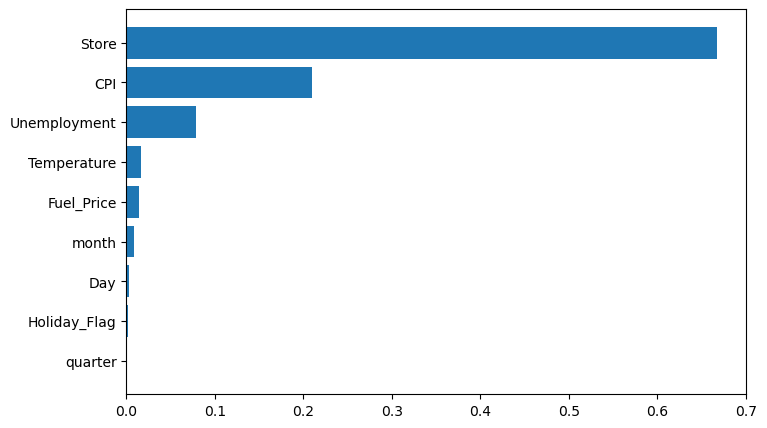

In [192]:
plt.figure(figsize=(8, 5))
plt.barh(ip_df.index, ip_df[0])
plt.show()